# Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import seaborn as sns

# Image Size and Directory Path

In [3]:
img_width, img_height = 224, 224
num_classes = 10
batch_size = 32
dataset_dir = "/content/drive/My Drive/Dataset_balance"

# Model Building

In [4]:
# base_model = ResNet50(weights = 'imagenet', include_top =False, input_shape=(img_width, img_height, 3))
base_model = InceptionV3(weights = 'imagenet', include_top =False, input_shape=(img_width, img_height, 3))

87910968/87910968 [==============================] - 3s 0us/step


In [5]:
for layer in base_model.layers:
  layer.trainable = False

In [6]:
x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation = 'softmax')(x)

In [7]:
model = Model(
    inputs=base_model.input, 
    outputs=predictions
    )

In [8]:
model.compile(
    optimizer='adam', 
    loss = 'categorical_crossentropy', 
    metrics = ['accuracy']
    )

In [9]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

# Pre-Process Data using ImageDataGenerator

In [10]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
  )

In [11]:
train_data = train_datagen.flow_from_directory(
    os.path.join(dataset_dir, "train"),
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 10040 images belonging to 10 classes.


In [12]:
train_data.class_indices

{'Bacterial_spot': 0,
 'Early_blight': 1,
 'Late_blight': 2,
 'Leaf_Mold': 3,
 'Septoria_leaf_spot': 4,
 'Spider_mites Two-spotted_spider_mite': 5,
 'Target_Spot': 6,
 'Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato_mosaic_virus': 8,
 'healthy': 9}

In [13]:
train_data.image_shape

(224, 224, 3)

In [14]:
val_datagen = ImageDataGenerator(rescale = 1./255)

In [15]:
val_data = val_datagen.flow_from_directory(
    os.path.join(dataset_dir, "val"),
    target_size = (img_width, img_height),
    batch_size = batch_size,
    class_mode = 'categorical'
)

Found 1250 images belonging to 10 classes.


# Visualizing Data

<Axes: xlabel='labels', ylabel='count'>

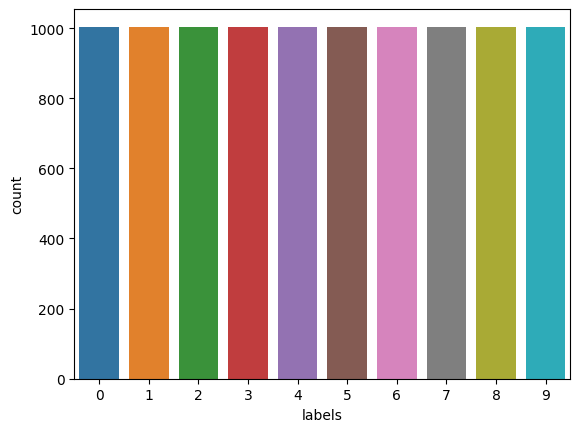

In [16]:
labelDf = pd.DataFrame(train_data.labels)
labelDf.rename(columns = {0:'labels'}, inplace = True)

sns.countplot(data=labelDf, x='labels')

# Model Checkpoint

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint

In [18]:
mc = ModelCheckpoint(filepath= "/content/drive/My Drive/model10ClassessWithoutPreprocess.h5", 
                     monitor  = "val_accuracy", 
                     verbose = 1, 
                     save_best_only= True)

In [19]:
his = model.fit(
    train_data,
    steps_per_epoch = train_data.batch_size,
    epochs = 40,
    validation_data = val_data,
    validation_steps = val_data.batch_size,
    callbacks = [mc]
)

Epoch 1/40
32/32 [==============================] - ETA: 0s - loss: 27.2554 - accuracy: 0.3398 
Epoch 1: val_accuracy improved from -inf to 0.52246, saving model to /content/drive/My Drive/model10ClassessWithoutPreprocess.h5
32/32 [==============================] - 871s 27s/step - loss: 27.2554 - accuracy: 0.3398 - val_loss: 4.3490 - val_accuracy: 0.5225
Epoch 2/40
32/32 [==============================] - ETA: 0s - loss: 3.4038 - accuracy: 0.5778 
Epoch 2: val_accuracy improved from 0.52246 to 0.62500, saving model to /content/drive/My Drive/model10ClassessWithoutPreprocess.h5
32/32 [==============================] - 441s 14s/step - loss: 3.4038 - accuracy: 0.5778 - val_loss: 2.0589 - val_accuracy: 0.6250
Epoch 3/40
32/32 [==============================] - ETA: 0s - loss: 1.3509 - accuracy: 0.6992
Epoch 3: val_accuracy improved from 0.62500 to 0.67090, saving model to /content/drive/My Drive/model10ClassessWithoutPreprocess.h5
32/32 [==============================] - 336s 11s/step - lo

# Result Visualization

In [20]:
from tensorflow.keras.models import load_model

In [ ]:
model = load_model("/content/drive/My Drive/model10ClassessWithoutPreprocess.h5")

In [ ]:
h = his.history
h.keys()

In [ ]:
plt.plot(h['loss'], "r")
plt.plot(h['accuracy'], "k")
plt.ylim((0, 1))
plt.title("loss V/s Accuracy")
plt.show()

In [ ]:
plt.plot(h['val_loss'], "r")
plt.plot(h['val_accuracy'], "k")
plt.ylim((0, 1))
plt.title("Val_loss V/s Val_Accuracy")
plt.show()

In [ ]:
plt.plot(h['accuracy'], "r")
plt.plot(h['val_accuracy'], "k")
plt.ylim((0, 1))
plt.title("Train_Accuracy V/s Val_Accuracy")
plt.show()

In [ ]:
plt.plot(h['loss'], "r")
plt.plot(h['val_loss'], "k")
plt.ylim((0, 1))
plt.title("Train_Loss V/s Val_Loss")
plt.show()